In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

df = pd.read_csv("C:\\Users\\nicog\\OneDrive\\Documents\\DataScientest\\Projet\\Datasets\\events.csv")

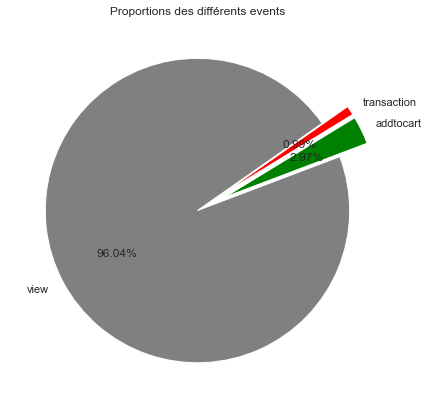

In [2]:
# Graphique piechart représentant la proportions des différentes occurences de la variable 'events'

explode = (0, 0.2, 0.2)  
colors = ['grey','green','red']
event_prop = (df.event.value_counts(normalize=True)).round(2)

plt.subplots(figsize=(8,7))

plt.pie(event_prop, 
        labels=event_prop.index,
        startangle=35,
        autopct='%.2f%%',
        explode=explode,
        colors=colors)

plt.title("Proportions des différents events");

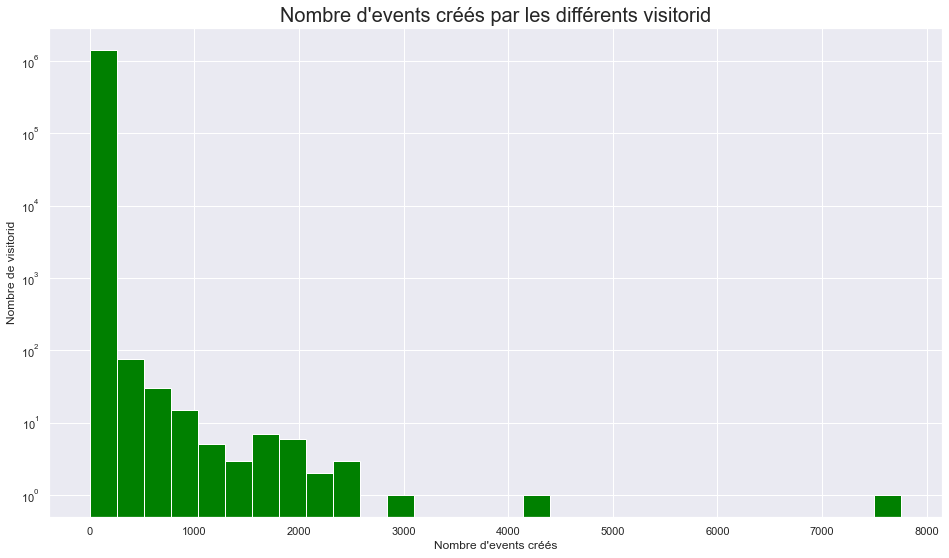

In [3]:
nb_visiteur = df.visitorid.value_counts()
param_hist = {'fontsize': 20}

plt.figure(figsize=(16, 9))
plt.hist(nb_visiteur.values, bins=30, log=True,color='green')

plt.xlabel("Nombre d'events créés")
plt.ylabel("Nombre de visitorid")
plt.title(label = "Nombre d'events créés par les différents visitorid",
         fontdict = param_hist );

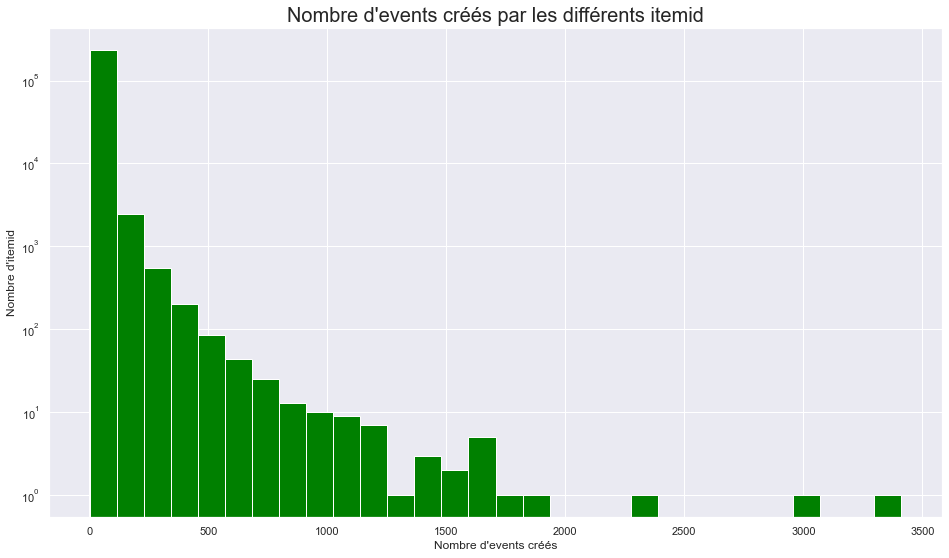

In [4]:
nb_product = df.itemid.value_counts()
plt.figure(figsize=(16, 9))
plt.hist(nb_product, bins=30, log=True,color='green')

plt.xlabel("Nombre d'events créés")
plt.ylabel("Nombre d'itemid")
plt.title(label = "Nombre d'events créés par les différents itemid",
         fontdict = param_hist );

c:\users\nicog\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


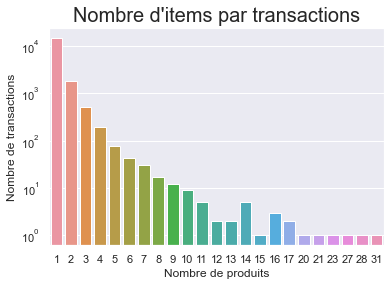

In [5]:
item_per_transaction = df[df['transactionid'].notnull()].groupby(['transactionid']).count()['timestamp']
sns.countplot(item_per_transaction, log = True)

plt.xlabel("Nombre de produits")
plt.ylabel("Nombre de transactions")
plt.title("Nombre d'items par transactions",
         fontdict = param_hist);

In [6]:
df = df.merge(pd.get_dummies(df['event']), left_index=True, right_index=True)

df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['weekday'] = df["date"].dt.weekday
df['month-day'] = df['date'].dt.strftime("%m-%d")

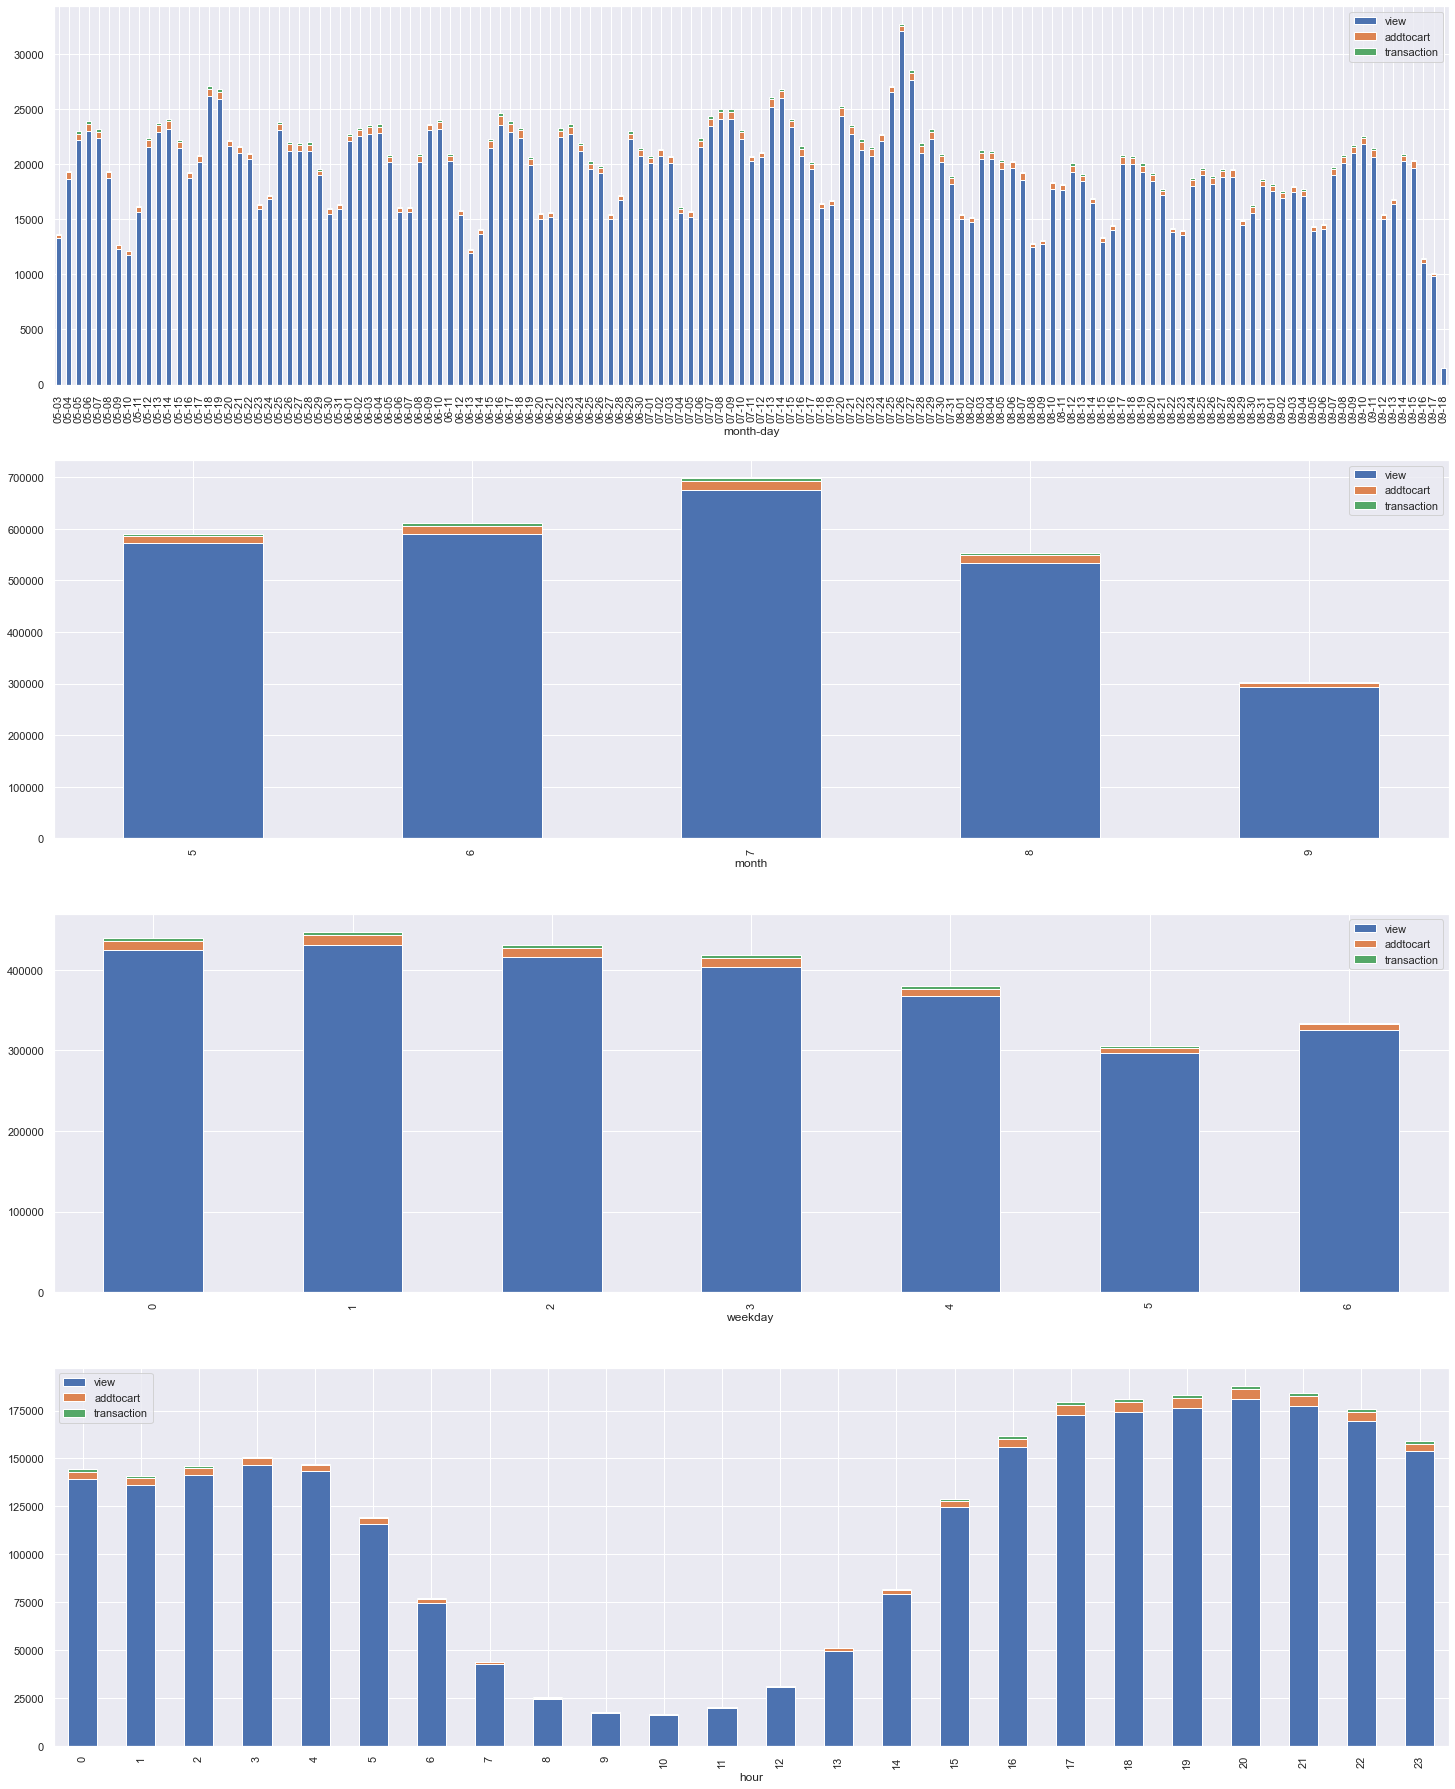

In [7]:
cols = ['month-day', 'month', 'weekday','hour']
fig, axes = plt.subplots(len(cols),1, figsize=(25,32))
for col , ax in zip(cols, axes.flat):
    event_agg = df[[col,'view','addtocart','transaction']].groupby(col).sum()
    event_agg.plot(kind='bar', stacked=True, ax=ax)

In [8]:
event_hour = pd.crosstab(df['event'], df['hour'])

stats.chi2_contingency(event_hour)

(2204.491972262143,
 0.0,
 46,
 array([[3.63006131e+03, 3.53947517e+03, 3.66970689e+03, 3.79500806e+03,
         3.70253524e+03, 3.00793255e+03, 1.93629432e+03, 1.10544766e+03,
         6.36668826e+02, 4.50515706e+02, 4.12756810e+02, 5.11417963e+02,
         7.92056369e+02, 1.28518605e+03, 2.05832523e+03, 3.24741602e+03,
         4.06981032e+03, 4.51926948e+03, 4.55823586e+03, 4.61227057e+03,
         4.72725786e+03, 4.63614345e+03, 4.42631870e+03, 4.00188959e+03],
        [1.17579598e+03, 1.14645465e+03, 1.18863739e+03, 1.22922310e+03,
         1.19927067e+03, 9.74285196e+02, 6.27175929e+02, 3.58060321e+02,
         2.06220386e+02, 1.45924410e+02, 1.33694105e+02, 1.65650972e+02,
         2.56551230e+02, 4.16278530e+02, 6.66702385e+02, 1.05185515e+03,
         1.31823300e+03, 1.46381519e+03, 1.47643660e+03, 1.49393873e+03,
         1.53118372e+03, 1.50167128e+03, 1.43370794e+03, 1.29623312e+03],
        [1.39497143e+05, 1.36016070e+05, 1.41020656e+05, 1.45835769e+05,
         1.4228219

In [9]:
event_month = pd.crosstab(df['event'], df['month'])

stats.chi2_contingency(event_month)

(104.2420911180213,
 5.784067759654191e-19,
 8,
 array([[ 14858.33953981,  15354.94072097,  17558.3647653 ,
          13920.27875031,   7640.07622362],
        [  4812.69444189,   4973.54618027,   5687.24683457,
           4508.85161103,   2474.66093224],
        [570980.9660183 , 590064.51309876, 674738.38840013,
         534932.86963867, 293595.26284414]]))